# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow/pytorch operations and basic numpy operations are allowed**
*Special Exception for this Lab-03. You can use cv2.LUT()


In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skopt import gp_minimize

Image Size is (667, 1000)


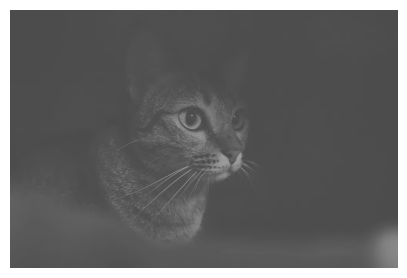

In [4]:
img = cv.imread('cat-in-low-dark-gray.jpg',cv.IMREAD_GRAYSCALE)
print('Image Size is {}'.format(img.shape))
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

Image Size is (667, 1000)


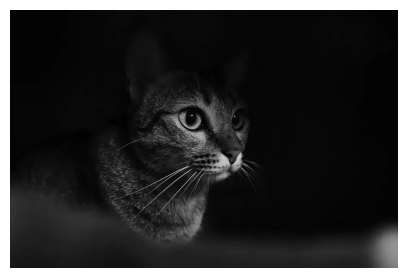

In [5]:
img_GT = cv.imread('cat-in-dark-gray.jpg',cv.IMREAD_GRAYSCALE)
print('Image Size is {}'.format(img_GT.shape))
plt.figure(figsize=(5,5))
plt.imshow(img_GT, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [6]:
img.dtype

dtype('uint8')

#Q1) a)Implement following function in Image "Linear_Contrast_stretching_plot.png" for Contrast Enhancement. Name this function as $lin\_stretch(img, params)$ [3 Marks]
Here $params = [r1,s1,r2,s2]$. Kindly tune the params to get better result.

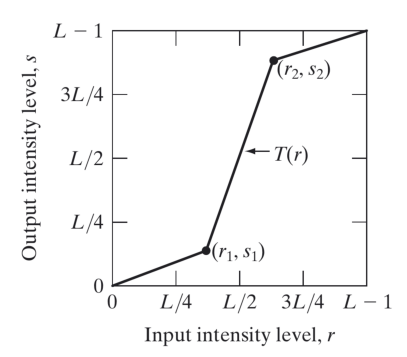

In [7]:
stretch_plot = cv.imread('Linear_Contrast_stretching_plot.png')
plt.figure(figsize=(5,5))
plt.imshow(stretch_plot)
plt.axis('off')
plt.show()

def lin_stretch(img, params):
    r1, s1, r2, s2 = params

    #output image
    out_img=np.zeros_like(img, dtype=np.float64)

    img=np.clip(img, 0, 255)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            p = img[i, j]
            if p < r1:
                out_img[i, j] = (s1 / r1) * p
            elif r1 <= p <= r2:
                out_img[i, j] = s1 + ((s2 - s1) / (r2 - r1)) * (p - r1)
            else:
                out_img[i, j] = s2 + ((255 - s2) / (255 - r2)) * (p - r2)
                
    out_img = out_img.astype(np.uint8)
    return out_img

#Q1) b) Apply $lin\_stretch$ function on $img$ and calculate its root mean squared error (RMSE) with $img\_GT$ [2 Marks]

Image Size is (667, 1000)


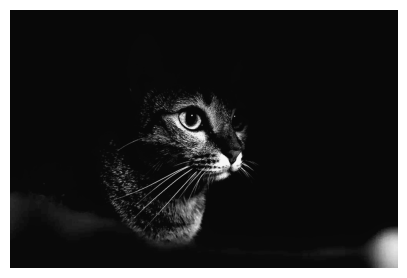

9.94210022186405 , 6.879949683404444 , 9.911238453198568
Image Size is (667, 1000)


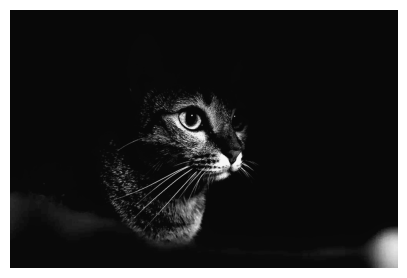

Size of image is (828, 1621)
Minimum and Maximum intensity value in image is (21,255)


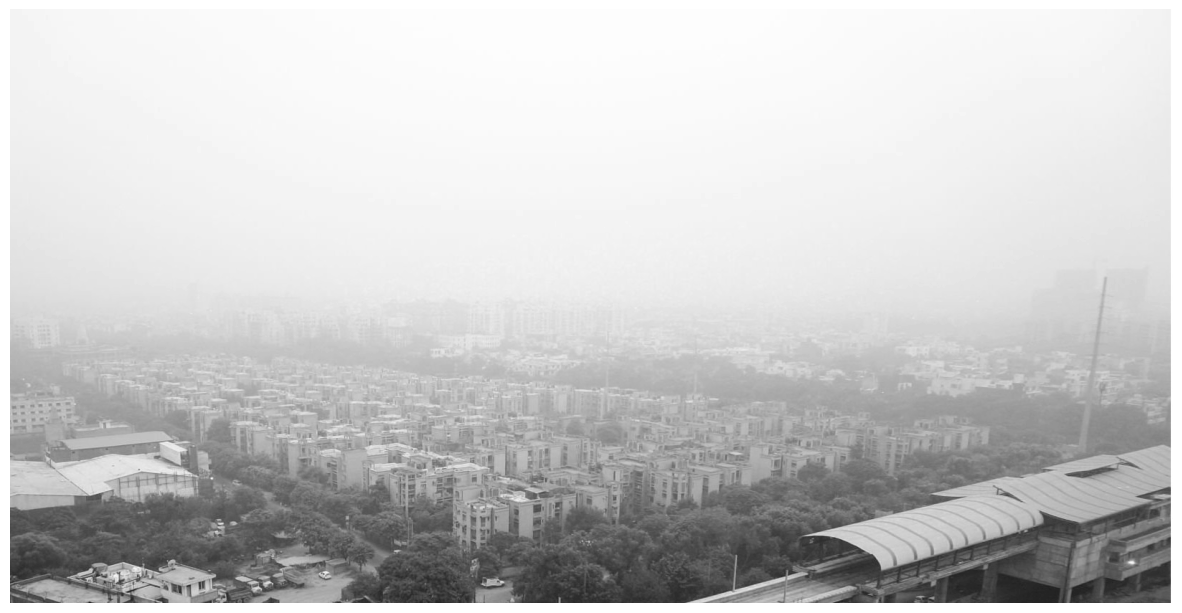

In [25]:


''''''
params1=[95, 32, 159, 223]
params2=[90, 10, 140, 245]
params3=[64, 64, 192, 255]
out_img1=lin_stretch(img, params1)
out_img2=lin_stretch(img, params2) #img2 produces lesser rmse : 6.879949683404444
out_img3=lin_stretch(img, params3)

print('Image Size is {}'.format(out_img1.shape))
plt.figure(figsize=(5,5))
plt.imshow(out_img2, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

def rmse(out_img, img_gt):
    
    if out_img.shape != img_gt.shape:
        raise ValueError("Images must have the same dimensions")
    
    squared_diff = (out_img - img_gt) ** 2
    
    mse = np.mean(squared_diff)
    
    rmse_value = np.sqrt(mse)
    
    return rmse_value

r1=rmse(out_img1, img_GT)
r2=rmse(out_img2, img_GT)
r3=rmse(out_img3, img_GT)

print(r1,",", r2,",", r3)

print('Image Size is {}'.format(out_img2.shape))
plt.figure(figsize=(5,5))
plt.imshow(out_img2, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

img2 = cv.imread('foggy_noida01_gray.jpg', cv.IMREAD_GRAYSCALE)
print('Size of image is {}'.format(img2.shape))
print('Minimum and Maximum intensity value in image is ({},{})'.format(np.min(img2) ,np.max(img2)))
plt.figure(figsize=(15,15))
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Size of image is (828, 1621)
Minimum and Maximum intensity value in image is (0,255)


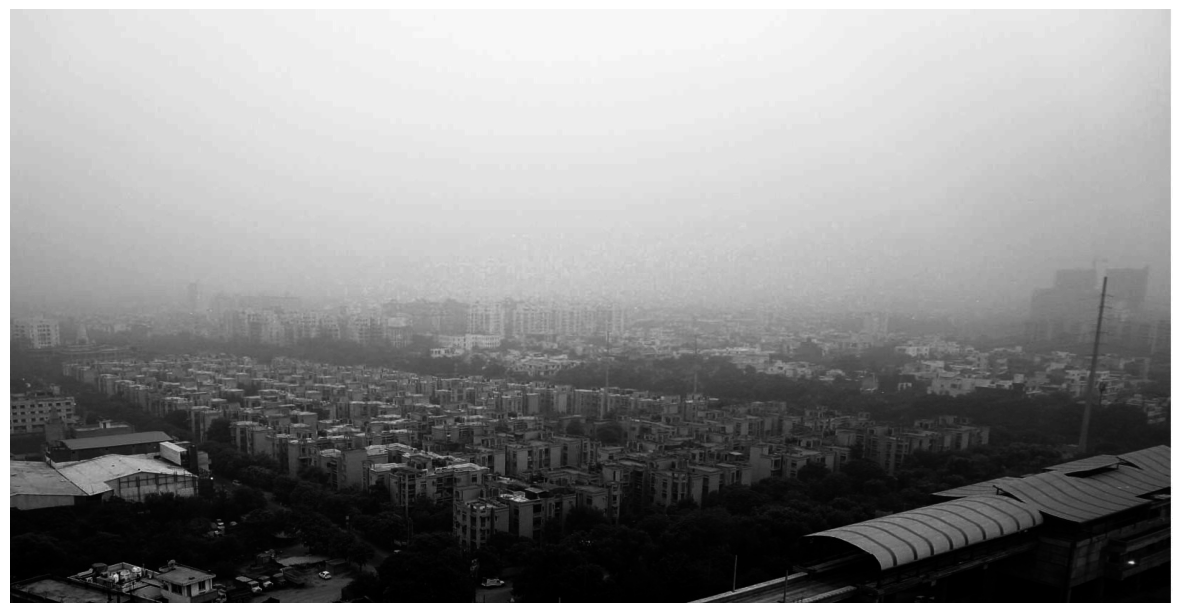

In [9]:
img2_GT = cv.imread('foggy_noida01_gray_GT.jpg', cv.IMREAD_GRAYSCALE)
print('Size of image is {}'.format(img2_GT.shape))
print('Minimum and Maximum intensity value in image is ({},{})'.format(np.min(img2_GT) ,np.max(img2_GT)))
plt.figure(figsize=(15,15))
plt.imshow(img2_GT, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#Q2) a) Implement Power-law (Gamma) Transformations $s = c.(\frac{r}{d})^{\gamma}$ as function $gamma\_corr(img2, gamma)$ [4 Marks]
Tune $gamma \in [1,5]$ to get better result.

In [10]:
def gamma_corr(img2, gamma):
    out_img2 = np.zeros_like(img2, dtype=np.float32)
    img2=np.clip(img2, 0, 255)
    out_img2=255*(img2/np.max(img2))**gamma

    out_img2=np.clip(out_img2, 0, 255)

    out_img2 = out_img2.astype(np.uint8)
    return out_img2


#Q2) b) Apply $gamma\_corr$ function on $img2$ and calculate its root mean squared error (RMSE) with $img2\_GT$ [1 Marks]

3.678718434984762
Size of image is (828, 1621)
Minimum and Maximum intensity value in image is (0,255)


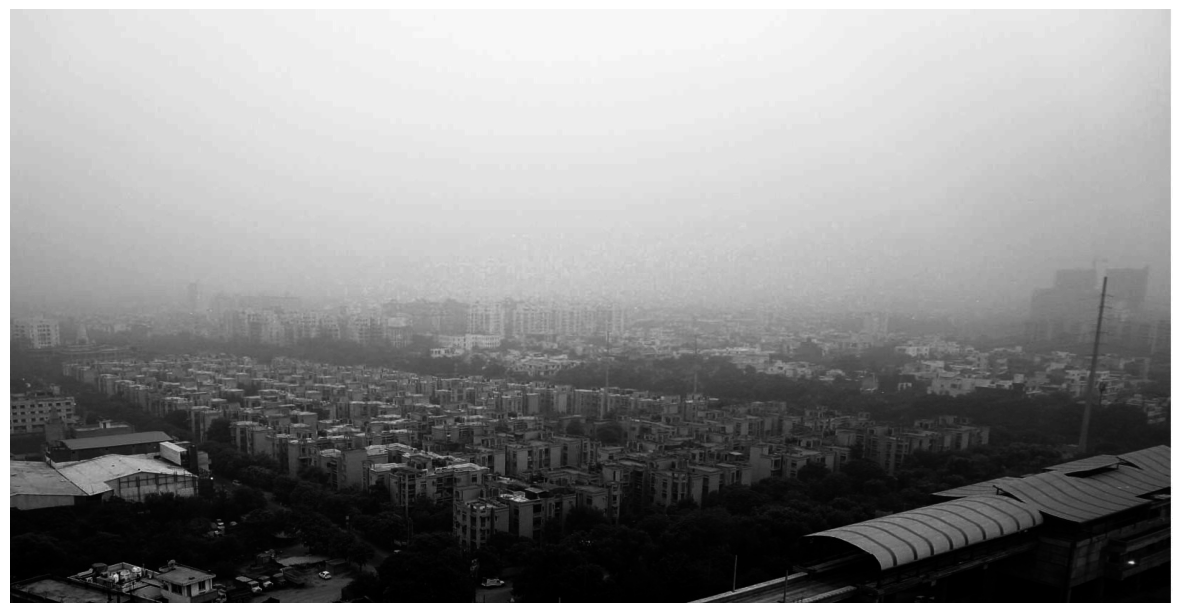

In [15]:
def objective(gamma):
    corrected_image=gamma_corr(img2, gamma[0])
    return rmse(corrected_image, img2_GT)

search_space=[(0.1,5)]

res=gp_minimize(objective, search_space, n_calls=20, random_state=42)
print(res.x[0])
out_img2_bay=gamma_corr(img2, res.x[0])

print('Size of image is {}'.format(out_img2_bay.shape))
print('Minimum and Maximum intensity value in image is ({},{})'.format(np.min(out_img2_bay) ,np.max(out_img2_bay)))
plt.figure(figsize=(15,15))
plt.imshow(img2_GT, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

